## Indexed mzML things?
In theory, the use of the index at the end of the mzML file (when converted without the `--noindex` option) allows parsers to index directly into a scan of interest. However, I'm skeptical about whether these are actually used with any consistency. Fortunately, now that the mzML parsers are written we can test whether they're implicitly part of things by comparing the `_idx` version with regular version.

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 3)  # (width, height) in inches
from mzsql import *
import timeit

In [2]:
pyteomics_spec = timeit.repeat('get_spec_mzml_pyteomics("../demo_data/180205_Poo_TruePoo_Full1.mzML", 1)', globals=globals(), number=1, repeat=10)
pymzml_spec = timeit.repeat('get_spec_mzml_pymzml("../demo_data/180205_Poo_TruePoo_Full1.mzML", 3)', globals=globals(), number=1, repeat=10)
pyopenms_spec = timeit.repeat('get_spec_mzml_pyopenms("../demo_data/180205_Poo_TruePoo_Full1.mzML", 1)', globals=globals(), number=1, repeat=10)

pyteomics_spec_idx = timeit.repeat('get_spec_mzml_pyteomics("../demo_data/180205_Poo_TruePoo_Full1_idx.mzML", 1)', globals=globals(), number=1, repeat=10)
pymzml_spec_idx = timeit.repeat('get_spec_mzml_pymzml("../demo_data/180205_Poo_TruePoo_Full1_idx.mzML", 3)', globals=globals(), number=1, repeat=10)
pyopenms_spec_idx = timeit.repeat('get_spec_mzml_pyopenms("../demo_data/180205_Poo_TruePoo_Full1_idx.mzML", 1)', globals=globals(), number=1, repeat=10)

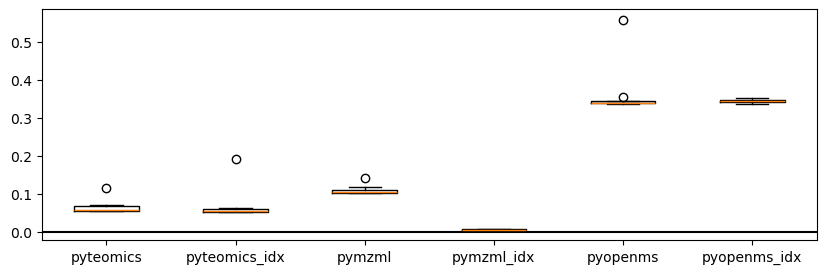

In [4]:
plt.boxplot([pyteomics_spec, pyteomics_spec_idx, pymzml_spec, pymzml_spec_idx, pyopenms_spec, pyopenms_spec_idx], tick_labels=["pyteomics", "pyteomics_idx", "pymzml", "pymzml_idx", "pyopenms", "pyopenms_idx"])
plt.axhline(y=0, color="k")
plt.show()

In [3]:
pyteomics_chrom = timeit.repeat('get_chrom_mzml_pyteomics("../demo_data/180205_Poo_TruePoo_Full1.mzML", 118.0865, 10)', globals=globals(), number=1, repeat=10)
pymzml_chrom = timeit.repeat('get_chrom_mzml_pymzml("../demo_data/180205_Poo_TruePoo_Full1.mzML", 118.0865, 10)', globals=globals(), number=1, repeat=10)
pyopenms_chrom = timeit.repeat('get_chrom_mzml_pyopenms("../demo_data/180205_Poo_TruePoo_Full1.mzML", 118.0865, 10)', globals=globals(), number=1, repeat=10)
pyopenms_chrom_2d = timeit.repeat('get_chrom_mzml_pyopenms_2DPeak("../demo_data/180205_Poo_TruePoo_Full1.mzML", 118.0865, 10)', globals=globals(), number=1, repeat=10)

pyteomics_chrom_idx = timeit.repeat('get_chrom_mzml_pyteomics("../demo_data/180205_Poo_TruePoo_Full1_idx.mzML", 118.0865, 10)', globals=globals(), number=1, repeat=10)
pymzml_chrom_idx = timeit.repeat('get_chrom_mzml_pymzml("../demo_data/180205_Poo_TruePoo_Full1_idx.mzML", 118.0865, 10)', globals=globals(), number=1, repeat=10)
pyopenms_chrom_idx = timeit.repeat('get_chrom_mzml_pyopenms("../demo_data/180205_Poo_TruePoo_Full1_idx.mzML", 118.0865, 10)', globals=globals(), number=1, repeat=10)
pyopenms_chrom_2d_idx = timeit.repeat('get_chrom_mzml_pyopenms_2DPeak("../demo_data/180205_Poo_TruePoo_Full1_idx.mzML", 118.0865, 10)', globals=globals(), number=1, repeat=10)

[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False


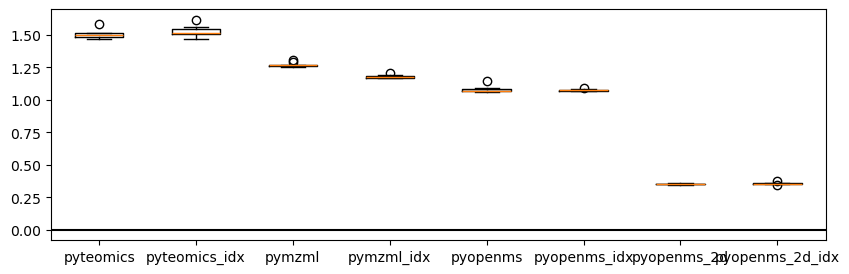

In [5]:
plt.boxplot([pyteomics_chrom, pyteomics_chrom_idx, pymzml_chrom, pymzml_chrom_idx, pyopenms_chrom, pyopenms_chrom_idx, pyopenms_chrom_2d, pyopenms_chrom_2d_idx], 
            tick_labels=["pyteomics", "pyteomics_idx", "pymzml", "pymzml_idx", "pyopenms", "pyopenms_idx", "pyopenms_2d", "pyopenms_2d_idx"])
plt.axhline(y=0, color="k")
plt.show()

In [7]:
pyteomics_rtrange = timeit.repeat('get_rtrange_mzml_pyteomics("../demo_data/180205_Poo_TruePoo_Full1.mzML", 6.5, 8)', globals=globals(), number=1, repeat=10)
pymzml_rtrange = timeit.repeat('get_rtrange_mzml_pymzml("../demo_data/180205_Poo_TruePoo_Full1.mzML", 6.5, 8)', globals=globals(), number=1, repeat=10)
pyopenms_rtrange = timeit.repeat('get_rtrange_mzml_pyopenms("../demo_data/180205_Poo_TruePoo_Full1.mzML", 6.5, 8)', globals=globals(), number=1, repeat=10)
pyopenms_rtrange_2d = timeit.repeat('get_rtrange_mzml_pyopenms_2DPeak("../demo_data/180205_Poo_TruePoo_Full1.mzML", 6.5, 8)', globals=globals(), number=1, repeat=10)

pyteomics_rtrange_idx = timeit.repeat('get_rtrange_mzml_pyteomics("../demo_data/180205_Poo_TruePoo_Full1_idx.mzML", 6.5, 8)', globals=globals(), number=1, repeat=10)
pymzml_rtrange_idx = timeit.repeat('get_rtrange_mzml_pymzml("../demo_data/180205_Poo_TruePoo_Full1_idx.mzML", 6.5, 8)', globals=globals(), number=1, repeat=10)
pyopenms_rtrange_idx = timeit.repeat('get_rtrange_mzml_pyopenms("../demo_data/180205_Poo_TruePoo_Full1_idx.mzML", 6.5, 8)', globals=globals(), number=1, repeat=10)
pyopenms_rtrange_2d_idx = timeit.repeat('get_rtrange_mzml_pyopenms_2DPeak("../demo_data/180205_Poo_TruePoo_Full1_idx.mzML", 6.5, 8)', globals=globals(), number=1, repeat=10)

[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False


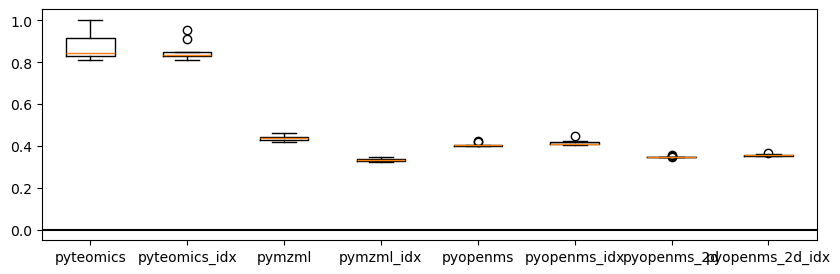

In [8]:
plt.boxplot([pyteomics_rtrange, pyteomics_rtrange_idx, pymzml_rtrange, pymzml_rtrange_idx, pyopenms_rtrange, pyopenms_rtrange_idx, pyopenms_rtrange_2d, pyopenms_rtrange_2d_idx], 
            tick_labels=["pyteomics", "pyteomics_idx", "pymzml", "pymzml_idx", "pyopenms", "pyopenms_idx", "pyopenms_2d", "pyopenms_2d_idx"])
plt.axhline(y=0, color="k")
plt.show()